In [1]:
import pandas as pd
data = pd.read_csv("beauty.csv")
data

,tenured,profnumber,minority,age,beautyf2upper,beautyflowerdiv,beautyfupperdiv,beautym2upper,beautymlowerdiv,beautymupperdiv,...,nonenglish,onecredit,percentevaluating,profevaluation,students,tenuretrack,blkandwhite,btystdvariance,btystdavepos,btystdaveneg
0,0,1,1,36,6,5,7,6,2,4,...,0,0,55.81395,4.7,43,1,0,2.129806,0.201567,0.000000
1,1,2,0,59,2,4,4,3,2,3,...,0,0,85.00000,4.6,20,1,0,1.386081,0.000000,-0.826081
2,1,3,0,51,5,5,2,3,2,3,...,0,0,100.00000,4.1,55,1,0,2.537435,0.000000,-0.660333
3,1,4,0,40,4,2,5,2,3,3,...,0,0,86.95652,4.5,46,1,0,1.760577,0.000000,-0.766312
4,0,5,0,31,9,7,9,6,7,6,...,0,0,87.50000,4.8,48,1,0,1.693100,1.421450,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,0,93,0,32,9,6,6,5,7,8,...,0,0,42.85714,4.1,21,1,0,3.107088,1.143040,0.000000
459,0,93,0,32,9,6,6,5,7,8,...,0,0,60.46511,4.5,86,1,0,3.107088,1.143040,0.000000
460,0,94,1,42,7,3,8,4,4,6,...,1,0,77.61194,4.4,67,1,0,3.018447,0.332051,0.000000
461,0,94,1,42,7,3,8,4,4,6,...,1,0,81.81818,4.4,66,1,0,3.018447,0.332051,0.000000


In [2]:

#Utwórz regresję przy użyciu piękna (zmienna btystdave), aby przewidzieć oceny kursu (courseevaluation), kontrolując różne 
#inne dane wejściowe.
import statsmodels.api as sm

X = data['btystdave']
Y = data['courseevaluation']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
    
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.08
Date:                Mon, 09 Dec 2019   Prob (F-statistic):           4.25e-05
Time:                        23:34:56   Log-Likelihood:                -375.32
No. Observations:                 463   AIC:                             754.6
Df Residuals:                     461   BIC:                             762.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0100      0.026    157.205      0.000       3.960       4.060
btystdave      0.1330      0.032      4.133      0.000       0.070       0.196
==============================================================================
Omnibus:                       15.399   Durbin-Watson:                   1.410
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.405
Skew:                          -0.453   Prob(JB):                     0.000274
Kurtosis:                       2.831   Cond. No.                         1.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

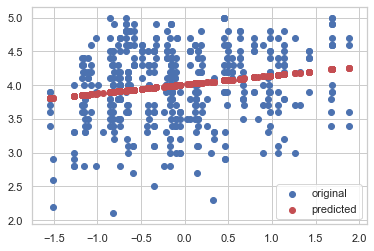

In [7]:
# Wyświetl dopasowany model graficznie i objaśnij znaczenie każdego ze współczynników wraz z pozostałym odchyleniem standardowym

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
scatter=ax.scatter(y=data['courseevaluation'], x=data['btystdave'],c='b', label='original')
scatter=ax.scatter(y=predictions, x=data['btystdave'],c='r', label='predicted')

ax.legend()
plt.show()


Coeffitients explanation:

Omnibus/Prob(Omnibus) – a test of the skewness and kurtosis of the residual . We hope to see a value close to zero which would indicate normalcy. The Prob (Omnibus) performs a statistical test indicating the probability that the residuals are normally distributed. We hope to see something close to 1 here. 

Skew – a measure of data symmetry. We want to see something close to zero, indicating the residual distribution is normal. Note that this value also drives the Omnibus.

Kurtosis – a measure of "peakiness", or curvature of the data. Higher peaks lead to greater Kurtosis. Greater Kurtosis can be interpreted as a tighter clustering of residuals around zero, implying a better model with few outliers.

Durbin-Watson – tests for homoscedasticity. We hope to have a value between 1 and 2.

Jarque-Bera (JB)/Prob(JB) – like the Omnibus test in that it tests both skew and kurtosis. We hope to see in this test a confirmation of the Omnibus test.

Condition Number – This test measures the sensitivity of a function's output as compared to its input. When we have multicollinearity, we can expect much higher fluctuations to small changes in the data, hence, we hope to see a relatively small number, something below 30. 
source: www.accelebrate.com/blog/interpreting-results-from-linear-regression-is-the-data-appropriate

In statistics, the standard deviation (SD, also represented by the lower case Greek letter sigma σ for the population standard deviation or the Latin letter s for the sample standard deviation) is a measure of the amount of variation or dispersion of a set of values.[1] A low standard deviation indicates that the values tend to be close to the mean (also called the expected value) of the set, while a high standard deviation indicates that the values are spread out over a wider range.
source: https://en.wikipedia.org/wiki/Standard_deviation

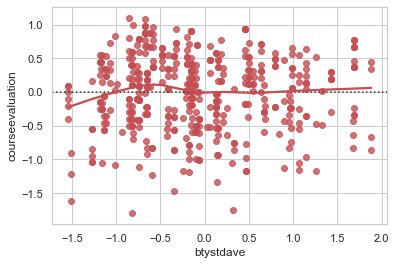

In [4]:
#Wykreślić residua względem dopasowanych wartości.

#Przypadek jet dwuwymiarowy więc użyję gotowej funkcji:
#Residua

import seaborn as sns

sns.set(style="whitegrid")

# Plot the residuals after fitting a linear model
sns.residplot(data['btystdave'], data['courseevaluation'], lowess=True, color="r")
plt.show()

In [11]:
# Dopasuj niektóre inne modele, w tym piękno, a także inne zmienne wejściowe. Dla każdego modelu określ, jakie są predyktory
# i jakie są dane wejściowe i wyjaśnij znaczenie każdego z jego współczynników.

#Model 2
#Predicting course-evaluation from beauty and professor-evaluation. Coeffitiens have been explained above.


X = data[['btystdave', 'profevaluation']]
Y = data['courseevaluation']
X = sm.add_constant(X) 
model2 = sm.OLS(Y, X).fit()
predictions2 = model2.predict(X)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1606.
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          3.22e-208
Time:                        00:12:19   Log-Likelihood:                 97.136
No. Observations:                 463   AIC:                            -188.3
Df Residuals:                     460   BIC:                            -175.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0309      0.072      0.427      0.669      -0.111       0.173
btystdave          0.0128      0.012      1.084      0.279      -0.010       0.036
profevaluation     0.9506      0.017     55.504      0.000       0.917       0.984
==============================================================================
Omnibus:                      103.892   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              358.857
Skew:                          -0.996   Prob(JB):                     1.19e-78
Kurtosis:                       6.826   Cond. No.                         35.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

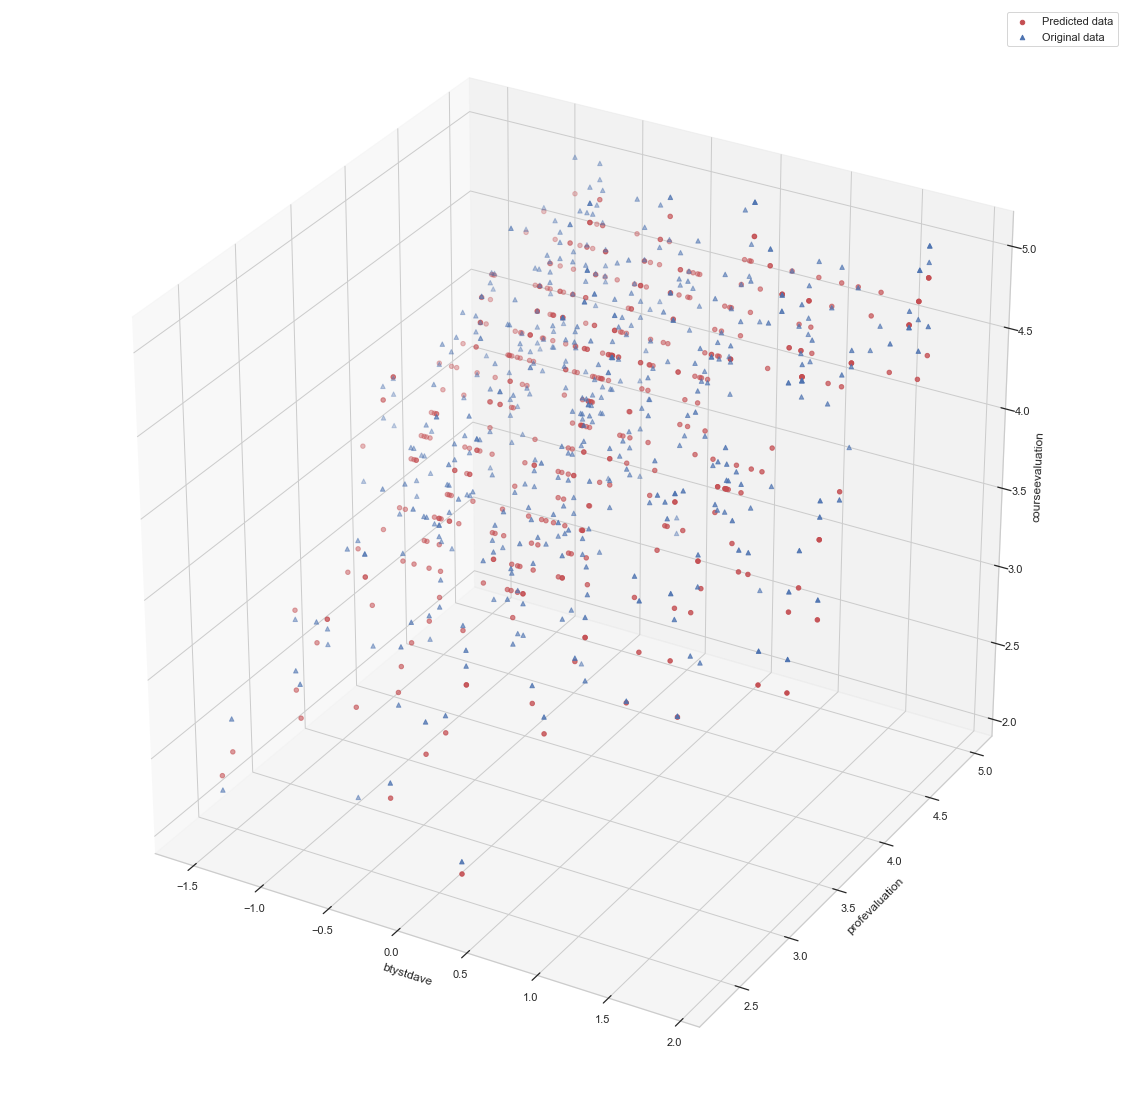

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

xs = data['btystdave']
ys = data['profevaluation']
zs = predictions2
ax.scatter(xs, ys, zs, c='r', marker='o', label='Predicted data')


xs = data['btystdave']
ys = data['profevaluation']
zs = data['courseevaluation']
ax.scatter(xs, ys, zs, c='b', marker='^', label='Original data')


ax.set_xlabel('btystdave')
ax.set_ylabel('profevaluation')
ax.set_zlabel('courseevaluation')

plt.legend()
plt.show()


In [19]:
#Model 3
#Predicting professor-evaluation from age

X = data['age']
Y = data['profevaluation']
X = sm.add_constant(X)
model3 = sm.OLS(Y, X).fit()
predictions3 = model.predict(X)
    
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.08
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           4.25e-05
Time:                        00:23:29   Log-Likelihood:                -375.32
No. Observations:                 463   AIC:                             754.6
Df Residuals:                     461   BIC:                             762.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0100      0.026    157.205      0.000       3.960       4.060
btystdave      0.1330      0.032      4.133      0.000       0.070       0.196
==============================================================================
Omnibus:                       15.399   Durbin-Watson:                   1.410
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.405
Skew:                          -0.453   Prob(JB):                     0.000274
Kurtosis:                       2.831   Cond. No.                         1.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

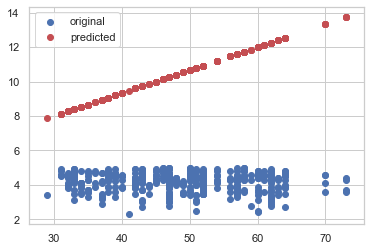

In [20]:
fig, ax = plt.subplots()
scatter=ax.scatter(y=data['profevaluation'], x=data['age'],c='b', label='original')
scatter=ax.scatter(y=predictions3, x=data['age'],c='r', label='predicted')

ax.legend()
plt.show()